In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)


In [2]:
# Load mutual fund dataset
df = pd.read_csv("Morningstar - European Mutual Funds.csv")

# Show dataset shape and top rows
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (57603, 132)


,ticker,isin,fund_name,inception_date,category,rating,analyst_rating,risk_rating,performance_rating,investment_strategy,...,fund_return_2016_q4,fund_return_2016_q3,fund_return_2016_q2,fund_return_2016_q1,fund_return_2015_q4,fund_return_2015_q3,fund_return_2015_q2,fund_return_2015_q1,quarters_up,quarters_down
0,0P00000BOW,LU0011983433,Morgan Stanley Investment Funds - Global Bond ...,1989-11-01,Global Bond,5.0,NaN,3.0,5.0,The Global Bond Fund's investment objective is...,...,-2.06,5.32,10.26,7.52,2.22,3.68,-7.67,3.27,16,7
1,0P00000ESH,LU0757425763,Threadneedle (Lux) - American Select Class AU ...,2000-07-28,US Large-Cap Growth Equity,2.0,NaN,3.0,2.0,The American Select Portfolio seeks to achieve...,...,8.94,8.33,8.67,0.46,8.85,-3.70,-4.42,5.90,17,6
2,0P00000ESL,LU0011818076,HSBC Global Investment Funds - Economic Scale ...,1987-01-16,Japan Large-Cap Equity,2.0,NaN,1.0,2.0,The sub-fund aims to provide long term total r...,...,6.77,13.15,7.59,-3.61,12.00,-8.66,-1.15,14.08,14,9
3,0P00000FI7,LU0152882725,Capital Group Global Equity Fund (LUX) B,2000-10-06,Global Large-Cap Growth Equity,2.0,NaN,2.0,2.0,Long-term capital growth through investment pr...,...,4.61,9.14,6.83,0.67,8.47,-6.78,-4.57,7.70,18,5
4,0P00000FIA,LU0114999294,Capital Group Global Equity Fund (LUX) B,2000-10-06,Global Large-Cap Growth Equity,2.0,NaN,2.0,2.0,Long-term capital growth through investment pr...,...,4.41,9.66,6.28,0.82,8.18,-6.99,-4.39,7.31,18,5


In [3]:
# Check data types
print("Column Types:")
print(df.dtypes.value_counts())

# Check for missing values (Top 25)
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

print("\nTop columns with missing values:")
print(missing.head(25))


Column Types:
float64    108
object      22
int64        2
Name: count, dtype: int64

Top columns with missing values:
analyst_rating                    49874
modified_duration                 47474
effective_maturity                44704
bond_credit_quality               42595
bond_interest_rate_sensitivity    42595
credit_bbb                        41102
credit_bb                         41102
credit_aaa                        41102
credit_aa                         41102
credit_a                          41102
credit_not_rated                  41102
credit_below_b                    41102
credit_b                          41102
average_credit_quality            41094
fund_trailing_return_10years      40165
dividend_frequency                31196
sector_utilities                  31156
sector_energy                     30159
sector_real_estate                29340
holdings_n_bonds                  28813
average_coupon_rate               28218
fund_return_2015                  27003
e

C:\Users\Aditya\AppData\Local\Temp\ipykernel_12712\3525848148.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing.head(15).values, y=missing.head(15).index, palette='Reds_r')


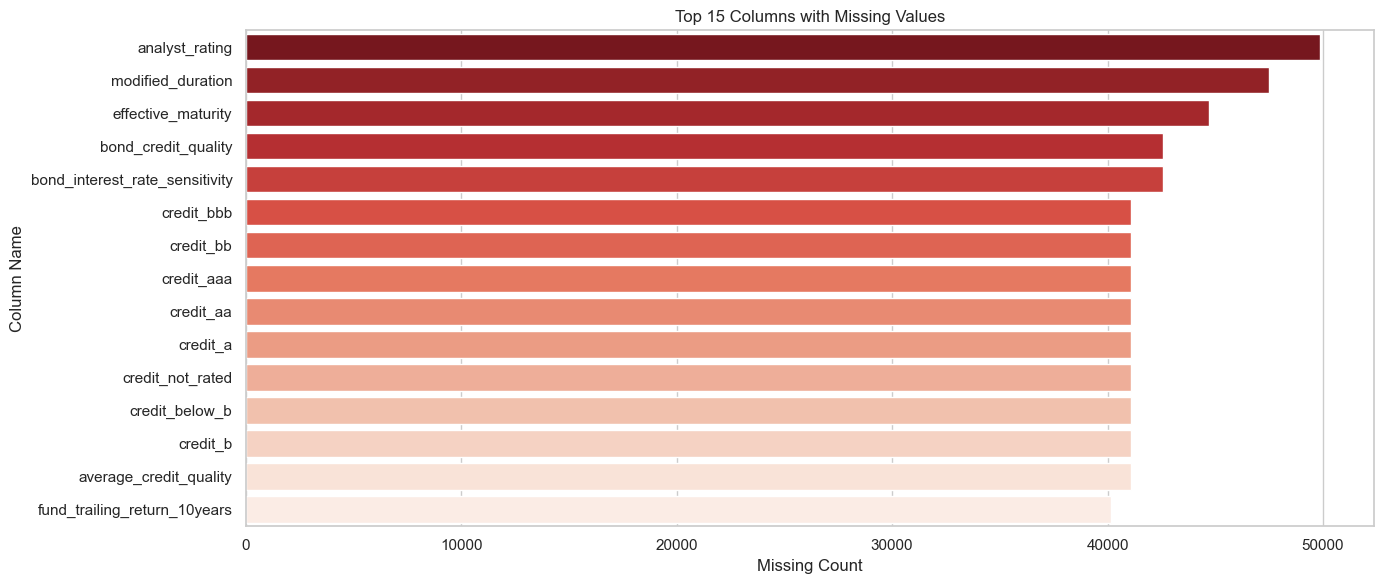

In [4]:
# Bar plot to visualize missingness
plt.figure(figsize=(14, 6))
sns.barplot(x=missing.head(15).values, y=missing.head(15).index, palette='Reds_r')
plt.title("Top 15 Columns with Missing Values")
plt.xlabel("Missing Count")
plt.ylabel("Column Name")
plt.tight_layout()
plt.show()


C:\Users\Aditya\AppData\Local\Temp\ipykernel_12712\502116738.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='crest')
C:\Users\Aditya\AppData\Local\Temp\ipykernel_12712\502116738.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='crest')
C:\Users\Aditya\AppData\Local\Temp\ipykernel_12712\502116738.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='crest')


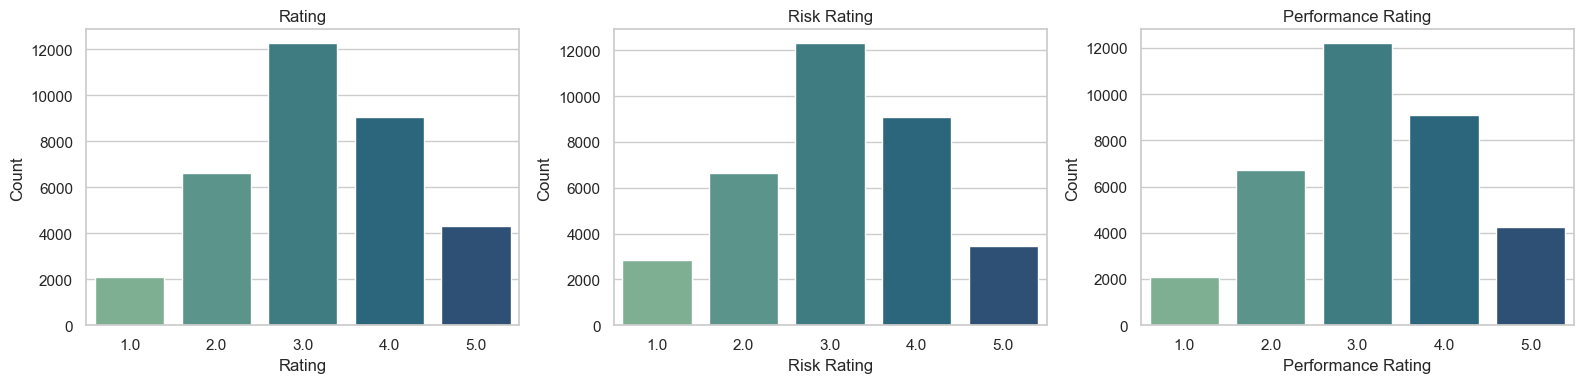

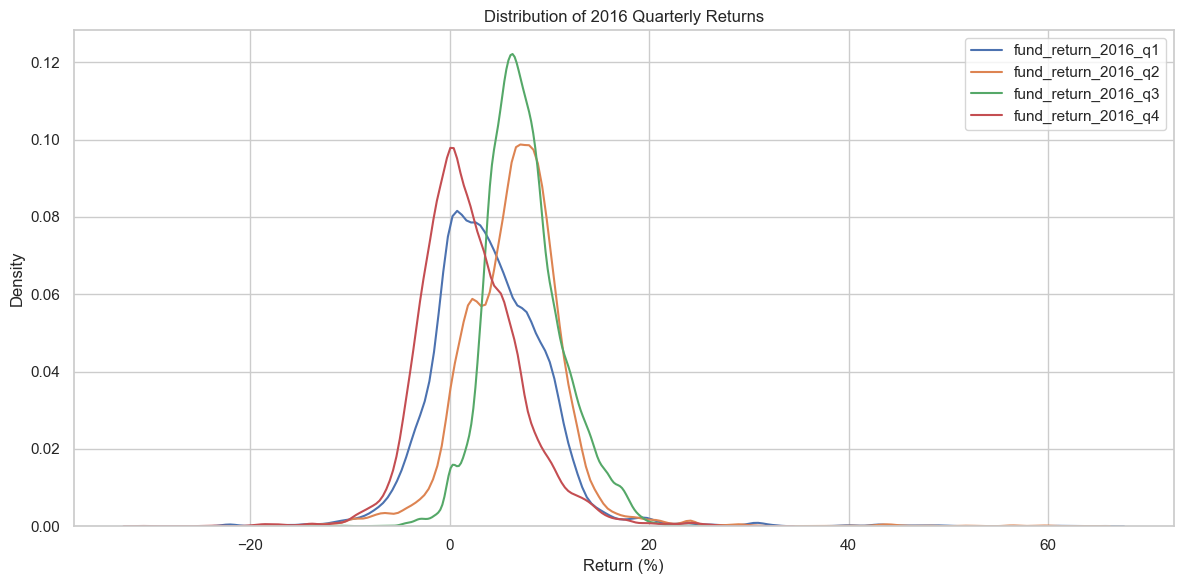

In [5]:
# Plot distribution of fund rating, risk rating, and performance rating
rating_cols = ['rating', 'risk_rating', 'performance_rating']

plt.figure(figsize=(16, 4))
for i, col in enumerate(rating_cols):
    plt.subplot(1, 3, i + 1)
    sns.countplot(data=df, x=col, palette='crest')
    plt.title(f'{col.replace("_", " ").title()}')
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Plot distribution of quarterly returns in 2016
return_cols_2016 = [
    'fund_return_2016_q1', 'fund_return_2016_q2',
    'fund_return_2016_q3', 'fund_return_2016_q4'
]

plt.figure(figsize=(12, 6))
for col in return_cols_2016:
    sns.kdeplot(df[col], label=col)
plt.title('Distribution of 2016 Quarterly Returns')
plt.xlabel('Return (%)')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()


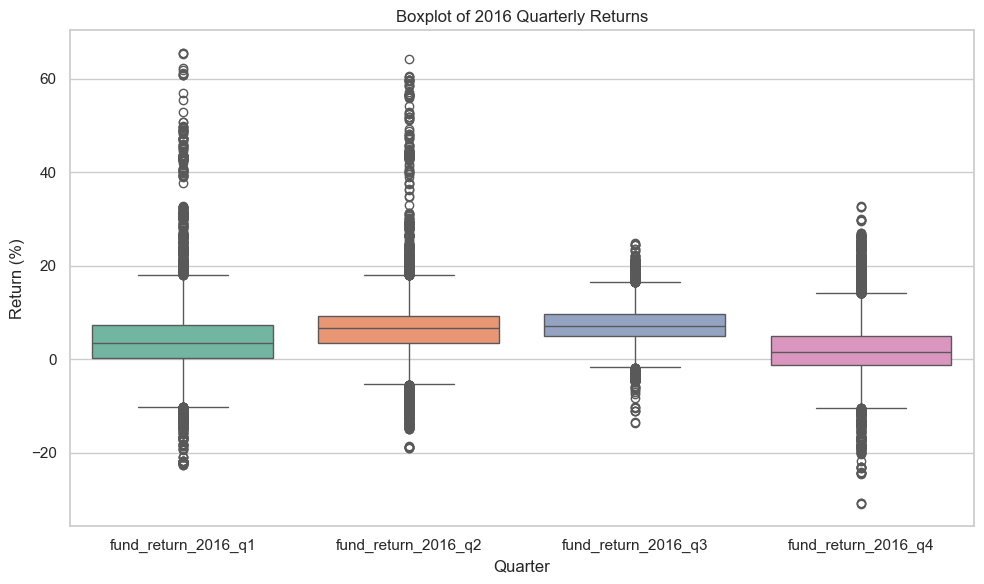

In [6]:
# Boxplot for all 2016 quarterly returns to spot outliers
q_returns = ['fund_return_2016_q1', 'fund_return_2016_q2',
             'fund_return_2016_q3', 'fund_return_2016_q4']

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[q_returns], palette='Set2')
plt.title("Boxplot of 2016 Quarterly Returns")
plt.ylabel("Return (%)")
plt.xlabel("Quarter")
plt.tight_layout()
plt.show()


In [7]:
# Average return for 2016 (target variable)
df['avg_quarterly_return_2016'] = df[
    ['fund_return_2016_q1', 'fund_return_2016_q2',
     'fund_return_2016_q3', 'fund_return_2016_q4']
].mean(axis=1)

# Volatility of 2016 returns
df['volatility_2016'] = df[
    ['fund_return_2016_q1', 'fund_return_2016_q2',
     'fund_return_2016_q3', 'fund_return_2016_q4']
].std(axis=1)

# Risk-adjusted return (Sharpe-like ratio)
df['return_volatility_ratio_2016'] = df['avg_quarterly_return_2016'] / df['volatility_2016']

# Check the new features
df[['avg_quarterly_return_2016', 'volatility_2016', 'return_volatility_ratio_2016']].describe()


,avg_quarterly_return_2016,volatility_2016,return_volatility_ratio_2016
count,39515.000000,38529.000000,3.851700e+04
mean,4.905355,4.682201,inf
std,2.795998,2.833724,NaN
min,-18.340000,0.000000,-4.548181e+00
25%,3.402500,2.968247,7.384307e-01
50%,4.955000,4.138522,1.105734e+00
75%,6.340000,5.796255,1.691879e+00
max,32.580000,45.471944,inf


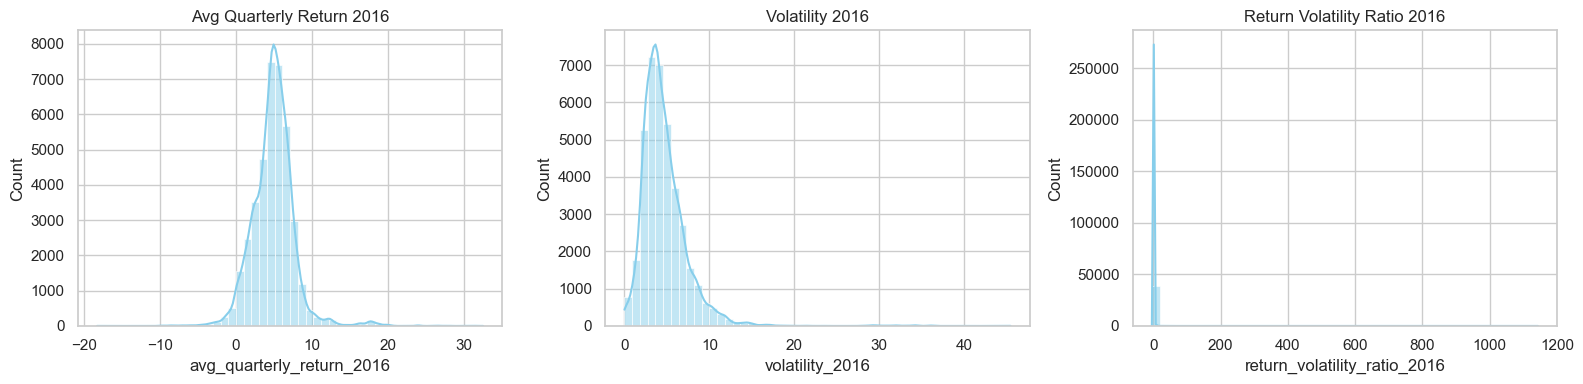

In [8]:
# Histograms of the engineered features
cols_to_plot = ['avg_quarterly_return_2016', 'volatility_2016', 'return_volatility_ratio_2016']

plt.figure(figsize=(16, 4))
for i, col in enumerate(cols_to_plot):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[col], bins=50, kde=True, color='skyblue')
    plt.title(col.replace("_", " ").title())
plt.tight_layout()
plt.show()


In [9]:
# Replace inf with NaN first (for consistency)
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with any NaNs in key columns
df = df.dropna(subset=[
    'avg_quarterly_return_2016',
    'volatility_2016',
    'return_volatility_ratio_2016'
])

# Check the shape after cleaning
print(" Cleaned dataset shape:", df.shape)


 Cleaned dataset shape: (38513, 135)


In [10]:
# Count top 5 fund categories
top_categories = df['category'].value_counts().nlargest(5).index.tolist()

# Create a new column with "Other" for rare categories
df['category_grouped'] = df['category'].apply(lambda x: x if x in top_categories else "Other")

# One-hot encode the grouped category column
df = pd.get_dummies(df, columns=['category_grouped'], prefix='cat', drop_first=True)

# Show encoded category columns
df.filter(like='cat_').head()


,cat_Global Emerging Markets Equity,cat_Global Large-Cap Blend Equity,cat_Other,cat_Other Bond,cat_Other Equity
0,False,False,True,False,False
1,False,False,True,False,False
2,False,False,True,False,False
3,False,False,True,False,False
4,False,False,True,False,False


In [11]:
# Convert ratings to numeric (force errors to NaN)
rating_cols = ['rating', 'risk_rating', 'performance_rating']
for col in rating_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with missing values in any rating
df.dropna(subset=rating_cols, inplace=True)

# Confirm they’re all numeric now
df[rating_cols].describe()


,rating,risk_rating,performance_rating
count,30552.000000,30552.000000,30552.000000
mean,3.195503,3.125360,3.194292
std,1.072405,1.078714,1.068635
min,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000


In [12]:
# 1. Drop columns with more than 40% missing values
threshold = len(df) * 0.6
df = df.dropna(thresh=threshold, axis=1)

# 2. Fill remaining numeric columns with median
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# 3. Double check for any remaining missing values
print(" Total remaining missing values:", df.isnull().sum().sum())


 Total remaining missing values: 41425


In [13]:
# Drop all remaining rows with any missing value (final cleanup)
df.dropna(inplace=True)

# Confirm zero missing values
print(" Missing values left after final cleanup:", df.isnull().sum().sum())
print(" Final dataset shape:", df.shape)


 Missing values left after final cleanup: 0
 Final dataset shape: (13398, 119)


In [14]:
from sklearn.model_selection import train_test_split

# Define target and features
target = 'avg_quarterly_return_2016'

# Select features (excluding ID columns and target)
ignore_cols = ['ticker', 'isin', 'fund_name', 'inception_date', target]
features = [col for col in df.columns if col not in ignore_cols]

# Split into X and y
X = df[features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Confirm shapes
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)


X_train: (10718, 114)
X_test : (2680, 114)
y_train: (10718,)
y_test : (2680,)


In [15]:
# Rebuild X with only numeric columns
X = df[features].select_dtypes(include=[np.number])

# Update train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Confirm it's clean now
print(" X_train types:", X_train.dtypes.unique())
print(" X_train shape:", X_train.shape)


 X_train types: [dtype('float64') dtype('int64')]
 X_train shape: (10718, 95)


In [16]:
# Train Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f" RMSE: {rmse:.4f}")
print(f" R² Score: {r2:.4f}")


 RMSE: 0.2429
 R² Score: 0.9927


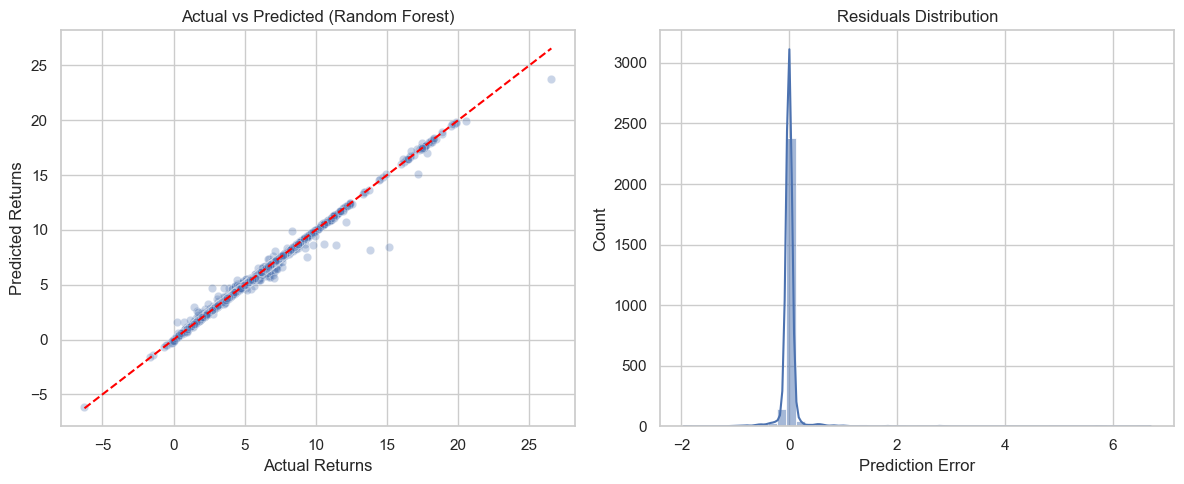

In [17]:
# Visualize predicted vs actual
plt.figure(figsize=(12, 5))

# 1. Actual vs Predicted
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Returns")
plt.ylabel("Predicted Returns")
plt.title("Actual vs Predicted (Random Forest)")

# 2. Residuals
residuals = y_test - y_pred
plt.subplot(1, 2, 2)
sns.histplot(residuals, bins=50, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Prediction Error")

plt.tight_layout()
plt.show()


In [18]:
import optuna
from optuna.samplers import TPESampler

# Define the Optuna objective function
def rf_objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False])
    }

    model = RandomForestRegressor(random_state=42, **params)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = mean_squared_error(y_test, preds, squared=False)
    return rmse


In [19]:
# Create and run the Optuna study
rf_study = optuna.create_study(
    direction='minimize',
    sampler=TPESampler(seed=42)
)
rf_study.optimize(rf_objective, n_trials=30)

# Display the best result
print(" Best RMSE from Random Forest:", rf_study.best_value)
print(" Best Hyperparameters:")
for key, value in rf_study.best_params.items():
    print(f"  {key}: {value}")


[I 2025-04-24 15:35:52,528] A new study created in memory with name: no-name-a2091a24-6357-4060-83dc-1187af8f5bd4
C:\Users\Aditya\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-04-24 15:36:14,493] Trial 0 finished with value: 0.40345129027890403 and parameters: {'n_estimators': 250, 'max_depth': 20, 'min_samples_split': 8, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 0 with value: 0.40345129027890403.
C:\Users\Aditya\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-04-24 15:36:40,718] Trial 1 finished with value: 

 Best RMSE from Random Forest: 0.3167364167508459
 Best Hyperparameters:
  n_estimators: 173
  max_depth: 18
  min_samples_split: 4
  min_samples_leaf: 1
  max_features: sqrt
  bootstrap: False


In [20]:
# Extract best parameters from Optuna
best_rf_params = rf_study.best_params

# Retrain Random Forest using best params
best_rf = RandomForestRegressor(random_state=42, **best_rf_params)
best_rf.fit(X_train, y_train)

# Predict and evaluate
rf_tuned_preds = best_rf.predict(X_test)
rf_tuned_rmse = mean_squared_error(y_test, rf_tuned_preds, squared=False)
rf_tuned_r2 = r2_score(y_test, rf_tuned_preds)

# Print results
print(f" Final Tuned RF RMSE: {rf_tuned_rmse:.4f}")
print(f" Final Tuned RF R² Score: {rf_tuned_r2:.4f}")


 Final Tuned RF RMSE: 0.3167
 Final Tuned RF R² Score: 0.9875


C:\Users\Aditya\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


C:\Users\Aditya\AppData\Local\Temp\ipykernel_12712\826473969.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=tuned_feat_imp_df.head(15), palette='coolwarm')


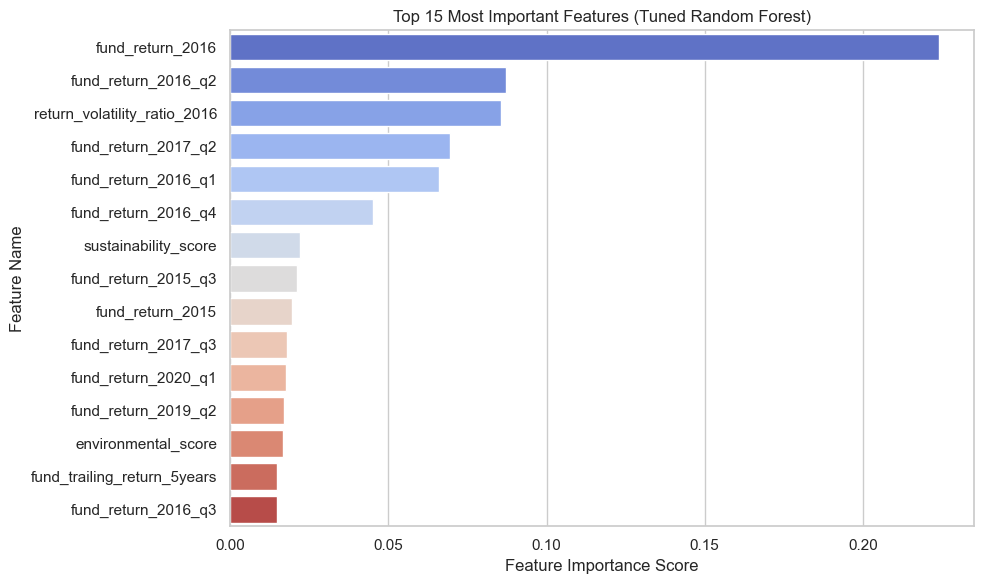

In [21]:
# Get feature importances from the tuned RF model
tuned_rf_importances = best_rf.feature_importances_
tuned_features_list = X_train.columns

# Create a DataFrame for visualization
tuned_feat_imp_df = pd.DataFrame({
    'Feature': tuned_features_list,
    'Importance': tuned_rf_importances
}).sort_values(by='Importance', ascending=False)

# Plot top 15 important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=tuned_feat_imp_df.head(15), palette='coolwarm')
plt.title('Top 15 Most Important Features (Tuned Random Forest)')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()


In [22]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Train XGBoost with default hyperparameters
xgb_base = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_base.fit(X_train, y_train)

# Predict on test set
xgb_base_preds = xgb_base.predict(X_test)

# Evaluate model
xgb_base_rmse = mean_squared_error(y_test, xgb_base_preds, squared=False)
xgb_base_r2 = r2_score(y_test, xgb_base_preds)

# Print results
print(f" XGBoost (Default) RMSE: {xgb_base_rmse:.4f}")
print(f" XGBoost (Default) R² Score: {xgb_base_r2:.4f}")


 XGBoost (Default) RMSE: 0.2462
 XGBoost (Default) R² Score: 0.9925


C:\Users\Aditya\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [23]:
import optuna
from optuna.samplers import TPESampler

# Objective function for tuning XGBoost
def xgb_objective(trial):
    params = {
        'objective': 'reg:squarederror',
        'eval_metric': 'rmse',
        'booster': 'gbtree',
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.3, 1.0),
        'subsample': trial.suggest_float('subsample', 0.3, 1.0),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 600),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
    }

    model = xgb.XGBRegressor(**params)
    model.fit(X_train, y_train, verbose=0)
    preds = model.predict(X_test)
    rmse = mean_squared_error(y_test, preds, squared=False)
    return rmse


In [24]:
# Create and run the Optuna study for XGBoost
xgb_study = optuna.create_study(
    direction='minimize',
    sampler=TPESampler(seed=42)
)
xgb_study.optimize(xgb_objective, n_trials=30)

# Display the best result
print(" Best RMSE from XGBoost:", xgb_study.best_value)
print(" Best Hyperparameters:")
for key, value in xgb_study.best_params.items():
    print(f"  {key}: {value}")


[I 2025-04-24 15:48:16,455] A new study created in memory with name: no-name-b304d092-a86b-4780-9f64-7181b9b3d0ea
C:\Users\Aditya\AppData\Local\Temp\ipykernel_12712\909139824.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
C:\Users\Aditya\AppData\Local\Temp\ipykernel_12712\909139824.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
C:\Users\Aditya\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use 

 Best RMSE from XGBoost: 0.2084277675281511
 Best Hyperparameters:
  lambda: 2.4998420357521005
  alpha: 0.002592989163257556
  colsample_bytree: 0.5493839988867333
  subsample: 0.9982288799366813
  learning_rate: 0.26892305292395235
  n_estimators: 503
  max_depth: 7
  min_child_weight: 6


In [25]:
# Get best parameters from Optuna study
best_xgb_params = xgb_study.best_params
best_xgb_params.update({
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse'
})

# Retrain XGBoost with best params
xgb_tuned = xgb.XGBRegressor(**best_xgb_params)
xgb_tuned.fit(X_train, y_train)

# Predict and evaluate
xgb_tuned_preds = xgb_tuned.predict(X_test)
xgb_tuned_rmse = mean_squared_error(y_test, xgb_tuned_preds, squared=False)
xgb_tuned_r2 = r2_score(y_test, xgb_tuned_preds)

# Print results
print(f" Final XGBoost (Tuned) RMSE: {xgb_tuned_rmse:.4f}")
print(f" Final XGBoost (Tuned) R² Score: {xgb_tuned_r2:.4f}")


 Final XGBoost (Tuned) RMSE: 0.2084
 Final XGBoost (Tuned) R² Score: 0.9946


C:\Users\Aditya\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


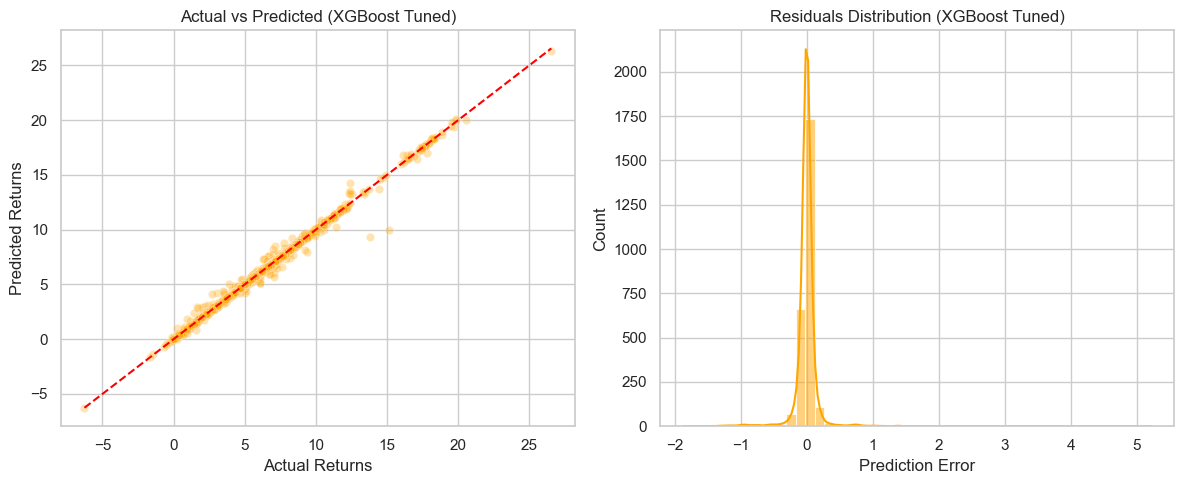

In [26]:
# Plot: Actual vs Predicted and Residuals for XGBoost
plt.figure(figsize=(12, 5))

# 1. Actual vs Predicted
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=xgb_tuned_preds, alpha=0.3, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Returns")
plt.ylabel("Predicted Returns")
plt.title("Actual vs Predicted (XGBoost Tuned)")

# 2. Residuals Distribution
residuals_xgb = y_test - xgb_tuned_preds
plt.subplot(1, 2, 2)
sns.histplot(residuals_xgb, bins=50, kde=True, color='orange')
plt.title("Residuals Distribution (XGBoost Tuned)")
plt.xlabel("Prediction Error")

plt.tight_layout()
plt.show()


C:\Users\Aditya\AppData\Local\Temp\ipykernel_12712\2155459348.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=xgb_importance_df.head(15), palette='YlOrBr')


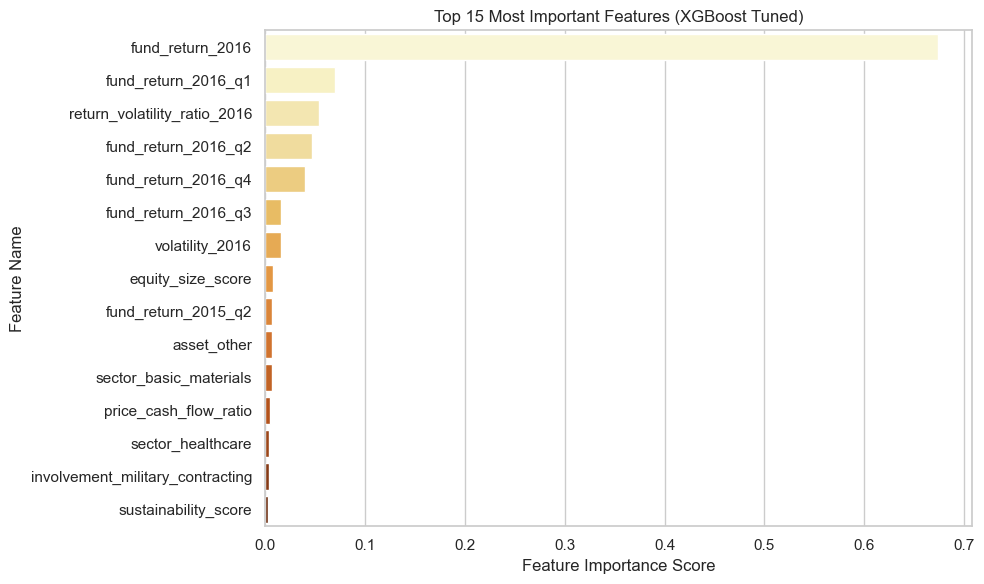

In [27]:
# Get feature importances from the tuned XGBoost model
xgb_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_tuned.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot top 15 important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=xgb_importance_df.head(15), palette='YlOrBr')
plt.title('Top 15 Most Important Features (XGBoost Tuned)')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()


In [28]:
# Final comparison of all models
final_comparison_df = pd.DataFrame({
    'Model': [
        'Random Forest (Default)',
        'Random Forest (Tuned)',
        'XGBoost (Default)',
        'XGBoost (Tuned)'
    ],
    'RMSE': [rmse, rf_tuned_rmse, xgb_base_rmse, xgb_tuned_rmse],
    'R² Score': [r2, rf_tuned_r2, xgb_base_r2, xgb_tuned_r2]
})

# Display the final comparison
final_comparison_df


,Model,RMSE,R² Score
0,Random Forest (Default),0.242920,0.992652
1,Random Forest (Tuned),0.316736,0.987508
2,XGBoost (Default),0.246190,0.992453
3,XGBoost (Tuned),0.208428,0.994591


In [29]:
!pip install shap


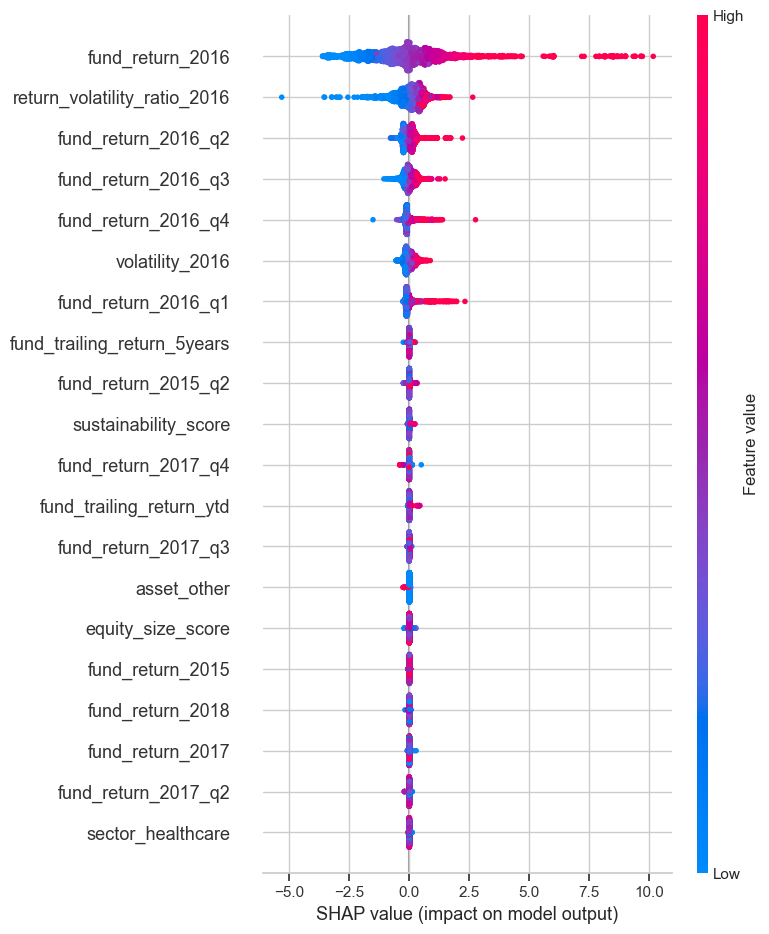

In [30]:
import shap

# Create SHAP explainer for XGBoost
explainer = shap.Explainer(xgb_tuned)

# Compute SHAP values for the test set
shap_values = explainer(X_test)

# SHAP summary plot (bar + beeswarm)
shap.summary_plot(shap_values, X_test)


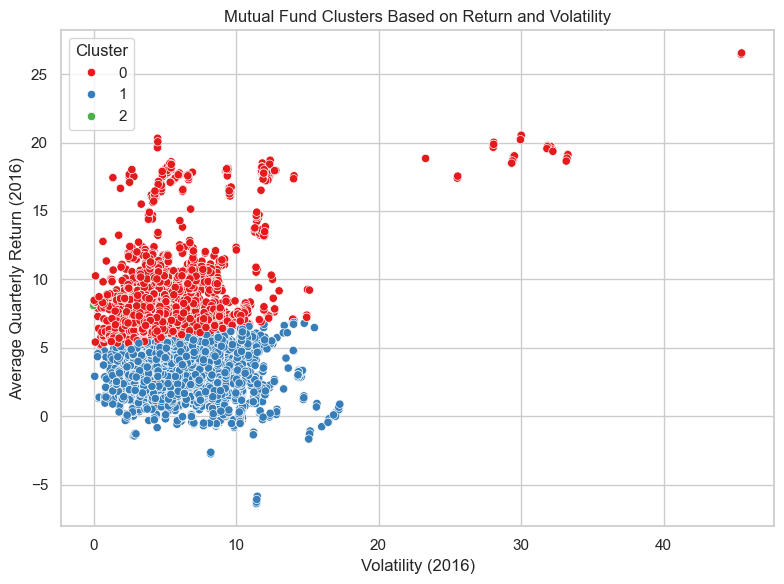

In [31]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering
cluster_features = df[['avg_quarterly_return_2016', 'volatility_2016', 'return_volatility_ratio_2016']]

# Standardize the features
scaler = StandardScaler()
scaled_cluster_data = scaler.fit_transform(cluster_features)

# Fit KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_cluster_data)

# Add cluster labels to the original DataFrame
df['Cluster'] = clusters

# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='volatility_2016',
    y='avg_quarterly_return_2016',
    hue='Cluster',
    palette='Set1',
    data=df
)
plt.title("Mutual Fund Clusters Based on Return and Volatility")
plt.xlabel("Volatility (2016)")
plt.ylabel("Average Quarterly Return (2016)")
plt.tight_layout()
plt.show()


In [32]:
# Assign readable labels to clusters based on interpretation
def label_cluster(row):
    if row['Cluster'] == 0:
        return 'Aggressive'
    elif row['Cluster'] == 1:
        return 'Balanced'
    else:
        return 'Conservative'

# Create new column with labels
df['Risk_Profile'] = df.apply(label_cluster, axis=1)

# Count funds per profile
profile_counts = df['Risk_Profile'].value_counts().reset_index()
profile_counts.columns = ['Risk Profile', 'Number of Funds']

# Display count of each fund type
profile_counts


,Risk Profile,Number of Funds
0,Balanced,7716
1,Aggressive,5680
2,Conservative,2
